# Exercícios

Utilizar o dataset bank

In [5]:
import pandas as pd

df = pd.read_csv('bank\\bank.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### 1) Olhando apenas para o grupo de divorciados, qual o percentual deles que é empreendedor (entrepreneur)? E estudantes?

In [9]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [25]:
tab = pd.crosstab(df['marital'], df['job'])
tab_divorced = tab.loc['divorced'] / tab.loc['divorced'].sum()*100
tab_divorced

job
admin.           13.068182
blue-collar      14.962121
entrepreneur      3.030303
housemaid         2.462121
management       22.537879
retired           8.143939
self-employed     2.840909
services         11.742424
student           0.000000
technician       16.856061
unemployed        4.166667
unknown           0.189394
Name: divorced, dtype: float64

In [30]:
pd.crosstab(df['marital'], df['job']).apply(lambda x:x/x.sum(), axis = 1)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,0.130682,0.149621,0.030303,0.024621,0.225379,0.081439,0.028409,0.117424,0.000000,0.168561,0.041667,0.001894
married,0.095102,0.247765,0.047193,0.030032,0.199142,0.062925,0.045406,0.084376,0.003575,0.146943,0.026814,0.010726
single,0.119565,0.145485,0.016722,0.012542,0.244983,0.009197,0.034281,0.099498,0.061873,0.224080,0.025920,0.005853


In [36]:
df.pivot_table(index='marital', columns='job', values='y',aggfunc='count').apply(lambda x:x/x.sum(), axis = 1)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,0.130682,0.149621,0.030303,0.024621,0.225379,0.081439,0.028409,0.117424,NaN,0.168561,0.041667,0.001894
married,0.095102,0.247765,0.047193,0.030032,0.199142,0.062925,0.045406,0.084376,0.003575,0.146943,0.026814,0.010726
single,0.119565,0.145485,0.016722,0.012542,0.244983,0.009197,0.034281,0.099498,0.061873,0.224080,0.025920,0.005853


### 2) O seu chefe decidiu criar duas categorias, Premium e Gold, para focar nos clientes mais promissores. Para a categoria Premium, entrarão os que possuem saldo (balance) nos top 10%. Ou seja, o grupo acima do percentil 90. Já o grupo Gold, ficarão os que possuem saldo nos top 20%, mas abaixo do grupo Premium. Ou seja, do p80 até o último do p90. Verifique quantos clientes possuem no grupo Premium e no Gold.

In [39]:
#0.8 até 0.9 é Gold e 0.9 até 1 é Premium com base no balance!
df['categoria'] = pd.qcut(df['balance'], q=[0.8,0.9,1],labels=['Gold', 'Premium'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,categoria
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,NaN
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Premium
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,NaN
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,NaN
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,NaN
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,NaN
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,NaN
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,NaN


In [41]:
df['categoria'].value_counts()

categoria
Gold       453
Premium    452
Name: count, dtype: int64

### 3) Seu chefe também quer saber se existe diferença nos percentuais vistos no exercício (1) para o grupo Premium. Verifique como a tabela cruzada da população se diferencia do grupo Premium. Existe diferença? Qual sua hipótese para que exista essa diferença?

In [44]:
pd.crosstab(df[df['categoria'] == 'Premium']['marital'], df[df['categoria'] == 'Premium']['job']).apply(lambda x:x/x.sum(), axis = 1)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,0.113636,0.045455,0.022727,0.022727,0.272727,0.204545,0.090909,0.090909,0.000000,0.113636,0.022727,0.000000
married,0.075601,0.154639,0.044674,0.044674,0.261168,0.103093,0.044674,0.082474,0.000000,0.161512,0.017182,0.010309
single,0.059829,0.153846,0.017094,0.025641,0.316239,0.017094,0.034188,0.051282,0.076923,0.205128,0.025641,0.017094


Podemos perceber que a porcentagem de management subiu e porcentagem de blue-collar caius. Ou seja, pessoas divoerciada com o 'job' de management tem mais probabilidade de ser premium

In [45]:
tab_geral = pd.crosstab(df['marital'], df['job']).apply(lambda x: x/x.sum(), axis=1)
tab_premium = pd.crosstab(df[df['categoria'] == 'Premium']['marital'],
                          df[df['categoria'] == 'Premium']['job']).apply(lambda x: x/x.sum(), axis=1)

# diferença percentual
diff = (tab_premium - tab_geral) * 100
diff.round(2)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,-1.70,-10.42,-0.76,-0.19,4.73,12.31,6.25,-2.65,0.00,-5.49,-1.89,-0.19
married,-1.95,-9.31,-0.25,1.46,6.20,4.02,-0.07,-0.19,-0.36,1.46,-0.96,-0.04
single,-5.97,0.84,0.04,1.31,7.13,0.79,-0.01,-4.82,1.51,-1.90,-0.03,1.12


### 4) Para a apresentação final, você decide criar uma tabela com os 10 clientes que possuem maior saldo (balance). Como a tabela é grande demais, você resolve apresentar apenas as informações relevantes: age, job, marital, education, default, loan, duration. Além disso, você decide destacar clientes que foram mais e menos atenciosos, pois são os que parecem ter maior e menor potencial, respectivamente. Para isso, destaque na tabela, de amarelo, o cliente de maior duration. Destaque, de vermelho, o que tem menor duration.

In [53]:
top10 = df[['age', 'job', 'marital', 'balance', 'education', 'default', 'loan', 'duration']].sort_values(by='balance', ascending=False).head(10).reset_index(drop=True)
top10

,age,job,marital,balance,education,default,loan,duration
0,60,retired,married,71188,primary,no,no,205
1,42,entrepreneur,married,42045,tertiary,no,no,205
2,43,technician,single,27733,tertiary,no,no,164
3,36,management,married,27359,tertiary,no,no,71
4,57,technician,married,27069,tertiary,no,yes,174
5,31,housemaid,single,26965,primary,no,no,654
6,75,retired,married,26452,secondary,no,no,219
7,50,services,married,26394,secondary,no,no,206
8,54,management,divorced,26306,tertiary,no,no,27
9,49,retired,single,25824,primary,no,no,94


In [65]:
def highlight_max_min(data):
    styles = pd.DataFrame('', index=data.index, columns=data.columns)
    cols = ['duration']
    for col in cols:
        max_val = data[col].max() 
        min_val = data[col].min() 
        styles[col] = ['background-color: lightgreen' if v == max_val else 'background-color: yellow' 
                       if v == min_val else '' for v in data[col]
                      ] 
    return styles
    
top10.style.apply(highlight_max_min, axis=None)

,age,job,marital,balance,education,default,loan,duration
0,60,retired,married,71188,primary,no,no,205
1,42,entrepreneur,married,42045,tertiary,no,no,205
2,43,technician,single,27733,tertiary,no,no,164
3,36,management,married,27359,tertiary,no,no,71
4,57,technician,married,27069,tertiary,no,yes,174
5,31,housemaid,single,26965,primary,no,no,654
6,75,retired,married,26452,secondary,no,no,219
7,50,services,married,26394,secondary,no,no,206
8,54,management,divorced,26306,tertiary,no,no,27
9,49,retired,single,25824,primary,no,no,94


### 5) Na sua opinião e de parte da diretoria, há 3 fatores que determinam se a pessoa vai aceitar a proposta do seu banco (y): o saldo (balance), se ela já deixou de pagar um empréstimo (default) e se ela tem um empréstimo pessoal (loan). Para avaliar essas 3 características junto com o aceite (y), você precisará criar uma tabela dinâmica, cujo valor observado seja a média do saldo. Avalie se existe diferença no saldo de quem aceita a proposta e tem empréstimo vs quem não aceita e não tem empréstimo, e o mesmo para o default. Em outras palavras, crie uma tabela dinâmica cruzando loan e default, mas também segmentando por aceite ou não da proposta. O saldo de quem aceita e tem empréstimo é maior ou menor do que o de quem não aceita? Por qual motivo você acha que isso acontece? Crie a sua hipótese para justificar o resultado achado!

In [68]:
df.pivot_table(index=['default'], columns='y', values='balance', aggfunc='mean')

y                      no          yes
loan default                          
no   no       1516.932588  1667.687898
     yes      -132.909091    61.428571
yes  no        978.337600   798.634146
     yes      -468.652174   167.000000

In [69]:
df.pivot_table(index=['default'], columns='y', values='balance', aggfunc='mean')

y,no,yes
default,,
no,1431.343504,1598.095703
yes,-248.164179,84.888889


In [70]:
df.pivot_table(index=['loan'], columns='y', values='balance', aggfunc='mean')

y,no,yes
loan,,
no,1495.275955,1644.165272
yes,926.978395,769.255814


Bom podemos perceber que quem não tem emprestimo e nem atraso tem saldo superior e quem aceita tem o saldo um pouco mais elevado. Ao contrário das pessoa que possuem emprestimos e atrasos. Acredito que tenha esta diferença na média por conta que muitas vezes estas pessoas estão dificuldades financeiramente. Oque podemos observar na tabela dinâmica é que quem aceita a proposta estão financeiramente melhor que quem não aceita a proposta.

### 6) Usando a tabela criada no exercício (5), qual o quadrante que possui menor saldo dentre os 8 da tabela dinâmica. Por qual motivo você acredita que o saldo dele é o menor de todos?

O quadrante com o menor saldo médio é o dos clientes que não aceitaram a proposta, possuem empréstimo e estão em atraso (default = yes).

Esse resultado faz sentido, pois esse grupo provavelmente enfrenta dificuldades financeiras significativas: já possuem dívidas em aberto e ainda estão inadimplentes. Isso explica o saldo negativo e a baixa capacidade de aceitar novas propostas do banco.

### Utilize os datasets do arquivo bike.zip e o esquema abaixo para responder às perguntas a seguir:

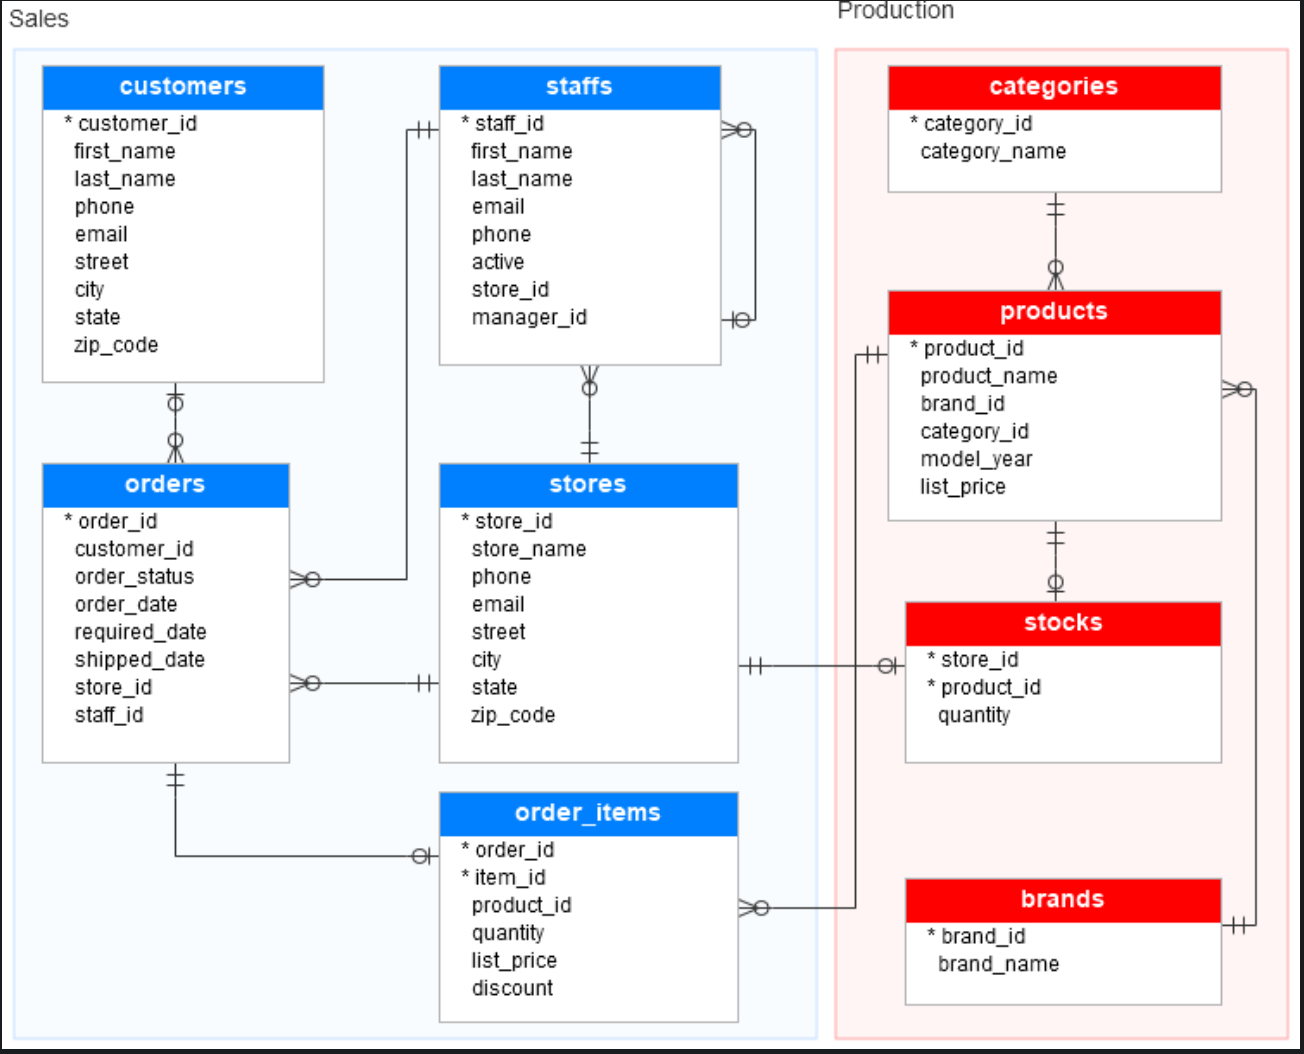

In [78]:
# importando as tabelas
customers = pd.read_csv('bicicleta\\customers.csv')
orders = pd.read_csv('bicicleta\\orders.csv')
staffs = pd.read_csv('bicicleta\\staffs.csv')
stores = pd.read_csv('bicicleta\\stores.csv')
order_items = pd.read_csv('bicicleta\\order_items.csv')
products = pd.read_csv('bicicleta\\products.csv')
stocks = pd.read_csv('bicicleta\\stocks.csv')
brands = pd.read_csv('bicicleta\\brands.csv')

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6


### 7) Você trabalha numa empresa de bicicletas e precisa fazer uma clusterização separando marcas caras de baratas. Para isso, você precisará saber a média de preços das bicicletas de cada marca.

In [103]:
marcas_valores = products.merge(brands, on = 'brand_id', how = 'left').groupby('brand_name')['list_price'].mean()
marcas_valores = pd.DataFrame(marcas_valores).reset_index().sort_values(by = 'list_price', ascending=False)
marcas_valores

,brand_name,list_price
8,Trek,2500.064074
2,Heller,2172.996667
7,Surly,1331.753600
0,Electra,761.006186
4,Ritchey,749.990000
1,Haro,621.990000
6,Sun Bicycles,524.468261
3,Pure Cycles,442.333333
5,Strider,209.990000


### 8) Agora que você já possui o preço médio de cada marca, você deve separar os valores em 3 grupos, sendo que os nomes de cada agrupamento será a partir dessa lista: ["Barato", "Médio", "Caro"].

In [104]:
marcas_valores['categoria'] = pd.qcut(marcas_valores['list_price'], q= 3 ,labels=['Baixo', 'Médio', 'Caro'])
marcas_valores

,brand_name,list_price,categoria
8,Trek,2500.064074,Caro
2,Heller,2172.996667,Caro
7,Surly,1331.753600,Caro
0,Electra,761.006186,Médio
4,Ritchey,749.990000,Médio
1,Haro,621.990000,Médio
6,Sun Bicycles,524.468261,Baixo
3,Pure Cycles,442.333333,Baixo
5,Strider,209.990000,Baixo


### 9) Outra demanda chegou, dessa vez precisamos entender se o preço tem alguma relação com as vendas. Bicicletas mais caras são mais vendidas que as mais baratas? Qual a diferença nas vendas entre cada um dos grupos que levantamos na última pergunta?

In [123]:
marcas_produtos = products.merge(brands, on = 'brand_id', how = 'left')
marcas_produtos_orders = order_items.merge(marcas_produtos[['brand_name', 'product_id']], on = 'product_id', how = 'left')
marcas_produtos_orders

,order_id,item_id,product_id,quantity,list_price,discount,brand_name
0,1,1,20,1,599.99,0.20,Electra
1,1,2,8,2,1799.99,0.07,Trek
2,1,3,10,2,1549.00,0.05,Surly
3,1,4,16,2,599.99,0.05,Electra
4,1,5,4,1,2899.99,0.20,Trek
...,...,...,...,...,...,...,...
4717,1614,2,159,2,2299.99,0.07,Trek
4718,1614,3,213,2,269.99,0.20,Electra
4719,1615,1,197,2,2299.99,0.20,Trek
4720,1615,2,214,1,899.99,0.07,Electra


In [141]:
quantidade_vendas_por_marca = marcas_produtos_orders.groupby('brand_name').agg({
    'quantity': 'sum',
    'list_price': 'mean'
})
quantidade_vendas_por_marca = pd.DataFrame(quantidade_vendas_por_marca).sort_values(by = 'list_price', ascending=False)
quantidade_vendas_por_marca
quantidade_vendas_por_marca['categoria'] = pd.qcut(quantidade_vendas_por_marca['list_price'], q= 3 ,labels=['Baixo', 'Médio', 'Caro'])
quantidade_vendas_por_marca

,quantity,list_price,categoria
brand_name,,,
Trek,1839,2766.872591,Caro
Heller,138,1400.042165,Caro
Surly,908,1165.934198,Caro
Ritchey,118,749.990000,Médio
Haro,331,629.262727,Médio
Sun Bicycles,731,529.408557,Médio
Electra,2612,519.394228,Baixo
Pure Cycles,376,441.945736,Baixo
Strider,25,194.990000,Baixo


Podemos perceber que produto mais barato tendem a vender em maior quantidade, principalmente os da marca Electra, que sozinha concentra o maior volume de vendas.
No entanto, chama atenção que a marca Trek, que possui os produtos mais caros, também apresenta um volume expressivo de vendas, indicando que há um público disposto a pagar mais por marcas de maior prestígio.
Em resumo, embora o grupo "Barato" venda mais no total o desempenho da categoria "Caro" mostra que marca e precepção de quelidade também influenciam foirtemente as vendas, não apenas o preço.

### 10) Uma das coisas mais importantes para sua marca é expandir pelo maior número de estados possíveis. Para isso, precisamos entender quais estados consomem pouco e quais estados consomem muitos produtos. Em outras palavras, precisamos entender de onde vem a receita e onde precisamos gastar mais com marketing, ou entender se seria melhor simplesmente desligar a operação no local. Crie uma tabela sumarizando os gastos por estado, verifique qual a diferença do estado que mais consome para o estado que menos consome.

In [151]:
orders_with_values = order_items[['order_id','quantity', 'list_price', 'discount']].merge(orders[['order_id', 'store_id']], on = 'order_id', how='left')
orders_with_values_store_states = orders_with_values.merge(stores[['store_id', 'state']], on = 'store_id', how = 'left')
orders_with_values_store_states['total'] = orders_with_values_store_states['quantity'] * orders_with_values_store_states['list_price'] * (1-orders_with_values_store_states['discount'])
receita_estados = orders_with_values_store_states.groupby('state')['total'].sum()
receita_estados = receita_estados.apply(lambda x: f"{x:,.2f}")
receita_estados

state
CA    1,605,823.04
NY    5,215,751.28
TX      867,542.24
Name: total, dtype: object

CA é o estado que mais gera receita e TX é o estado que gera menos receita.